In [1]:
# Import Standard Libraries
import os.path, time
import glob
import pdb

# Import SGRT Libraries
import SGRTFileReaders as fs

sgrt_path = ('Sample_Directory')

class PatientDetails:
    """The PatientDeatils class contains attributes and methods for reading and storing 
    information from the 'Patient Details.ini' and 'Patient Details.vpax' files."""
    
    # Attributes
    path = [] # the full path to this patient
    
    # Methods
    def __init__(self,path):
        self.path = path
        self.pdini = fs.read_PatientDetails_ini(path)
        self.pdvpax = fs.read_PatientDetails_vpax(path)
    
class Patient:
    """The Patient class contains attributes and methods that pertain to an individual OSMS/AlignRT patient"""
    
    # Attributes
    path = [] # the full path to this patient
    mrn = [] # the MRN of this patient
    patient_details = [] # information derived from the Patient Details files
    last_treatment = [] # DateTime object containing the last treatment
    
    # Methods
    def __init__(self,mrn,path):
        self.path = path
        self.mrn = mrn
        self.patient_details = PatientDetails(path)
        self.last_treatment =  self.get_last_treatment(path)
        
    def get_last_treatment(self,path):
        print(path)
        list_of_reports = glob.glob('{0}/Reports/*'.format(path)) # * means all if need specific format then *.csv
        if not list_of_reports:
            # list of reports is empty
            print("Reports is empty")
            return 0
        else:
            latest_file = max(list_of_reports, key=os.path.getctime)
            print(time.ctime(os.path.getctime(latest_file)))
            return time.ctime(os.path.getctime(latest_file))

def SGRT_Patient_Tool():
    print('Welcome to the SGRT Patient Tool')
    
    # Get a list of the subdirectories in the sgrt_path
    sgrt_folders = [name for name in os.listdir(sgrt_path) if os.path.isdir(os.path.join(sgrt_path, name))]
        
    # Determine which of the folders correspond to patients
    sgrt_patients = []
    for folder in sgrt_folders:
        if (os.path.isfile('{0}/{1}/Patient Details.ini'.format(sgrt_path,folder)) or 
            os.path.isfile('{0}/{1}/Patient_Details.ini'.format(sgrt_path,folder))):
            sgrt_patients.append(Patient(folder,'{0}/{1}'.format(sgrt_path,folder)))
    
    print('There are {0} patient folders in {1}'.format(len(sgrt_patients),sgrt_path))
    for patient in sgrt_patients:
        print(patient.mrn)
        vpax = patient.patient_details.pdvpax
        print(vpax['PatientID'])

In [2]:
SGRT_Patient_Tool()

Welcome to the SGRT Patient Tool
Sample_Directory/20170307JHV
Wed Jan 31 16:48:44 2018
Sample_Directory/20150925ZEL
Wed Jan 31 16:48:42 2018
Sample_Directory/OSMS-IPA
Wed Jan 31 16:48:47 2018
Sample_Directory/20160804MG
Wed Jan 31 16:48:42 2018
Sample_Directory/20170912
Wed Jan 31 16:48:45 2018
Sample_Directory/20170303ZEL
Wed Jan 31 16:48:43 2018
Sample_Directory/SVS CAP HET
Wed Jan 31 16:48:47 2018
Sample_Directory/20170308
Wed Jan 31 16:48:45 2018
Sample_Directory/20170327DJJ
Reports is empty
Sample_Directory/VRTQAPhantom_
Wed Jan 31 16:48:47 2018
There are 10 patient folders in Sample_Directory
20170307JHV
20170307JHV
20150925ZEL
20150925ZEL
OSMS-IPA
OSMS-IPA
20160804MG
20160804MG
20170912
20170912
20170303ZEL
20170303ZEL
SVS CAP HET
SVS CAP HET
20170308
20170308
20170327DJJ
20170327DJJ
VRTQAPhantom_
VRTQAPhantom_


In [3]:
thisfile = open("Sample_Directory/20150925ZEL/Patient_Details.ini",'r')
print(thisfile.read())
thisfile.close()

[Patient Details]
PatientGUID=319aadc3-481d-4dc3-bd60-bd934e0f588c
Prefix=-
Firstname=WinstonLutzTests
Middlename=
Surname=ZZUWQA
Name=WinstonLutzTests ZZUWQA (Other)
Skintone=0
Version=5.0.1749.273
Notes=
[Treatment Site]
Other_Notes=



In [4]:
import xml.etree.ElementTree as ET
from datetime import datetime
import dateutil.parser

root = ET.parse("Sample_Directory/20150925ZEL/Patient_Details.vpax").getroot()

dateutil.parser.parse(root.find('DOB').text)

root.find('GUID').text

'319aadc3-481d-4dc3-bd60-bd934e0f588c'

In [5]:
root.find('DOB').text

'2015-09-25T00:00:00'

In [6]:
tree = ET.parse("Sample_Directory/20150925ZEL/Patient_Details.vpax").getroot()

def anydup(thelist):
    seen = set()
    for x in thelist:
        if x in seen: return True
        seen.add(x)
    return False

def etree_to_dict(t,enumerated=False):
    d={}
    count=1
    
    for child in t:
        # Construct key name
        if enumerated:
            key = '{}-{}'.format(child.tag,count)
        else: 
            key = child.tag
        
        # Determine if the child has children
        if len(child)>0:
            # enumberate the children?
            enum = anydup([ele.tag for ele in child])
            d[key] = etree_to_dict(child,enum)
            count=count+1
        else:
            d[child.tag] = child.text
        
    return d

tree_d = etree_to_dict(tree)

tree_d

{'DOB': '2015-09-25T00:00:00',
 'Description': None,
 'FirstName': 'WinstonLutzTests',
 'GUID': '319aadc3-481d-4dc3-bd60-bd934e0f588c',
 'IsFromDicom': 'false',
 'LastUsedPlotterType': '0',
 'LatestApprovedRecordSurfaceTimestamp': '171010 213300',
 'MiddleName': None,
 'Notes': None,
 'PatientID': '20150925ZEL',
 'PatientTextureLuminosity': '0',
 'PatientVersion': '5.0.1749.273',
 'Sex': 'Other',
 'Sites': {'Site': {'Description': 'Right Breast',
   'GUID': '0e838256-2cb9-471e-8e19-a638c8d8c093',
   'IsFromDicom': 'false',
   'Phases': {'Phase': {'Description': 'TB2871 (0.01 ,-15.66 ,28.08)',
     'DicomRTPlanUID': '1.2.246.352.71.5.508639987643.299285.20171005161823',
     'Fields': {'Field': {'Description': 'ISOCENTER FIELD',
       'GUID': '7db3a5c4-7110-48e2-948c-d7b34b2c49c5',
       'IsFromDicom': 'false',
       'IsIsoCenterField': 'true',
       'IsoRotValue': '345',
       'LatestApprovedSurfaceDateTimeStamp': '171010 213300',
       'RepresentedCouchRotation': '0'}},
     'GU

In [35]:
import numpy as np
import pandas as pd

filename = '/Volumes/Physics/Dustin/OSMS/0468333/180606 151042/Monitoring_180606_151046/RealTimeDeltas_180606_151046.txt'
df = pd.read_csv(filename,skiprows=11)


df[' D.MAG (cm)'] = df[' D.VRT (cm)']*df[' D.VRT (cm)'] +df[' D.LAT (cm)']*df[' D.LAT (cm)'] +df[' D.LNG (cm)']*df[' D.LNG (cm)'] 
df[' D.MAG (cm)'] = df[' D.MAG (cm)'].apply(np.sqrt)
df[df[' Translation (cm)'] < 10].head()


,Elapsed Time (sec),Translation (cm),D.VRT (cm),D.LNG (cm),D.LAT (cm),D.Rtn (deg),D.Roll (deg),D.Pitch (deg),D.Amp (cm),XRayState,Couch Rot (deg),Trans Threshold (cm),Rot Threshold (deg),Beamhold Timer (sec),Beamhold State,ROI Index,RMS (mm),Gating Active,D.MAG (cm)
0,0.546,0.012324,-0.001556,0.001214,-0.012164,0.014265,0.051397,0.005200,0.001106,0,0,N/A,N/A,1312,1,1,0.116704,0,0.012324
1,0.977,0.019819,0.005881,0.018606,-0.003468,0.039243,0.010312,0.062088,-0.002764,0,0,N/A,N/A,1312,1,1,0.123370,0,0.019819
2,1.338,0.017217,0.000880,0.008497,-0.014949,0.053029,0.064056,0.028603,0.000779,0,0,N/A,N/A,1312,1,1,0.129254,0,0.017217
3,1.701,0.029416,0.006239,0.028437,-0.004210,-0.057111,0.082446,0.097242,-0.006850,0,0,N/A,N/A,1313,1,1,0.145066,0,0.029416
4,2.143,0.037877,0.009247,0.030483,-0.020493,0.063729,0.100356,0.120714,-0.007712,0,0,N/A,N/A,1313,1,1,0.135491,0,0.037877


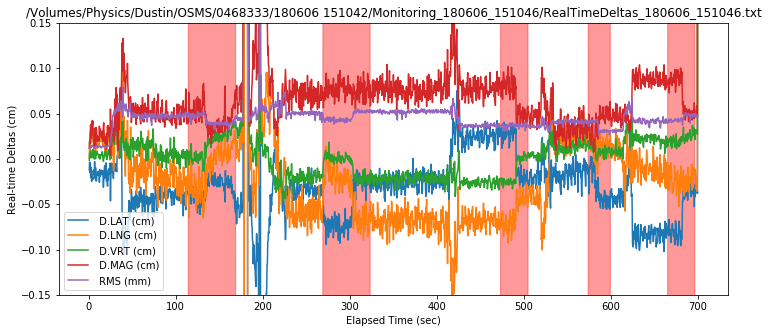

In [38]:
import matplotlib.pyplot as plt
from math import ceil
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,5)
ax = plt.axes()

ax.plot(df['Elapsed Time (sec)'],df[' D.LAT (cm)'])
ax.plot(df['Elapsed Time (sec)'],df[' D.LNG (cm)'])
ax.plot(df['Elapsed Time (sec)'],df[' D.VRT (cm)'])
ax.plot(df['Elapsed Time (sec)'],df[' D.MAG (cm)'])
ax.plot(df['Elapsed Time (sec)'],1/10*df[' RMS (mm)'])
#ax.plot(df['Elapsed Time (sec)'],df[' D.VRT (cm)'])
#ax.plot(df['Elapsed Time (sec)'],df[' D.Amp (cm)'])
ax.fill_between(df['Elapsed Time (sec)'], -1.0*np.ones(len(df['Elapsed Time (sec)'])),2*df[' XRayState']-1,color='r',alpha=.4)


# determine last moment of beam on

ax.set_ylim(-.15,.15)
#ax.set_xlim(0,ceil(df[df[' XRayState'] == 1]['Elapsed Time (sec)'].max())+10)
ax.legend(loc=3)
ax.set_title(filename)
ax.set_xlabel('Elapsed Time (sec)')
ax.set_ylabel('Real-time Deltas (cm)');

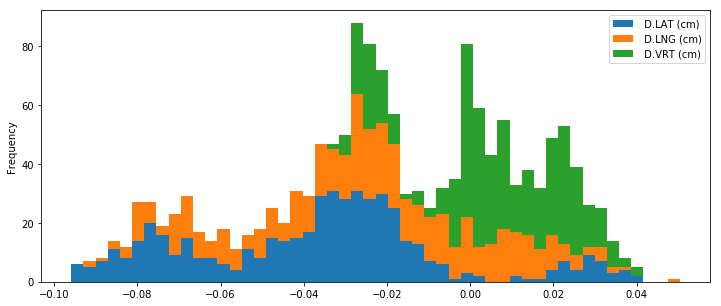

In [39]:
dfb = df[df[' XRayState'] == 1]
dfb[[' D.LAT (cm)',' D.LNG (cm)',' D.VRT (cm)']].plot.hist(stacked=True, bins=50)


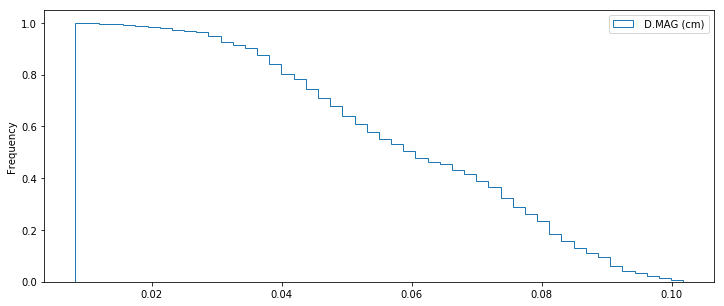

In [53]:
dfb[[' D.MAG (cm)']].plot.hist(stacked=True, bins=50, cumulative=-1, histtype='step',normed=1)

# ax.hist(x, n_bins, normed=1, histtype='step',
#                           cumulative=True, label='Empirical')
